# Thompson Sampling

## Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [8]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [9]:
import random
N = 500
d = 10
ads_selected = []
number_of_rewards_zero = [0] * 10
number_of_rewards_one = [0] * 10
total_reward = 0
for n in range (0,N):
  ad = 0
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(number_of_rewards_zero[i]+1,number_of_rewards_one[i]+1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    number_of_rewards_one[ad] = number_of_rewards_one[ad] + 1
  else:
     number_of_rewards_zero[ad] = number_of_rewards_zero[ad] + 1
  total_reward = total_reward + reward


## Visualising the results - Histogram

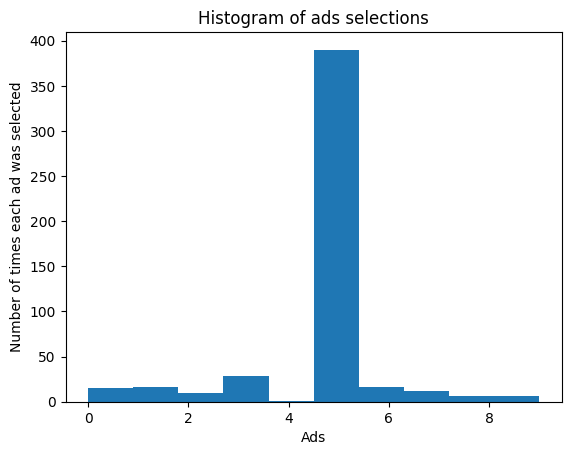

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()